<a href="https://colab.research.google.com/github/Sahanasd2003/-House-prices-prediction-/blob/main/House_prices_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('/content/archive (5).zip')

In [3]:
df_train.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

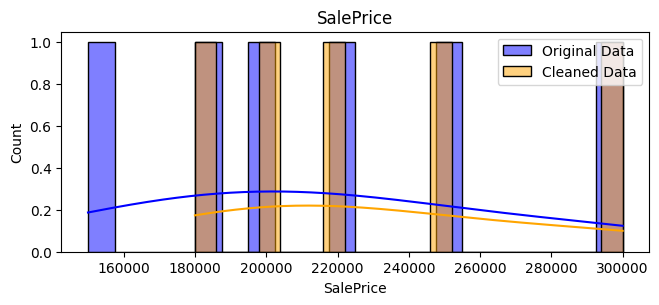

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'OtherVar': [1, 2, 3, 4, 5, 6]
})

df_cleaned = df_train.drop([1])

num_var = ['SalePrice']

plt.figure(figsize=(25, 25))

for i, var in enumerate(num_var):
    plt.subplot(9, 4, i + 1)
    sns.histplot(df_train[var], bins=20, kde=True, color='blue', label='Original Data', alpha=0.5)
    sns.histplot(df_cleaned[var], bins=20, kde=True, color='orange', label='Cleaned Data', alpha=0.5)

    plt.title(var)
    plt.legend()

plt.tight_layout()
plt.show()

In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.530108
Kurtosis: -0.021193


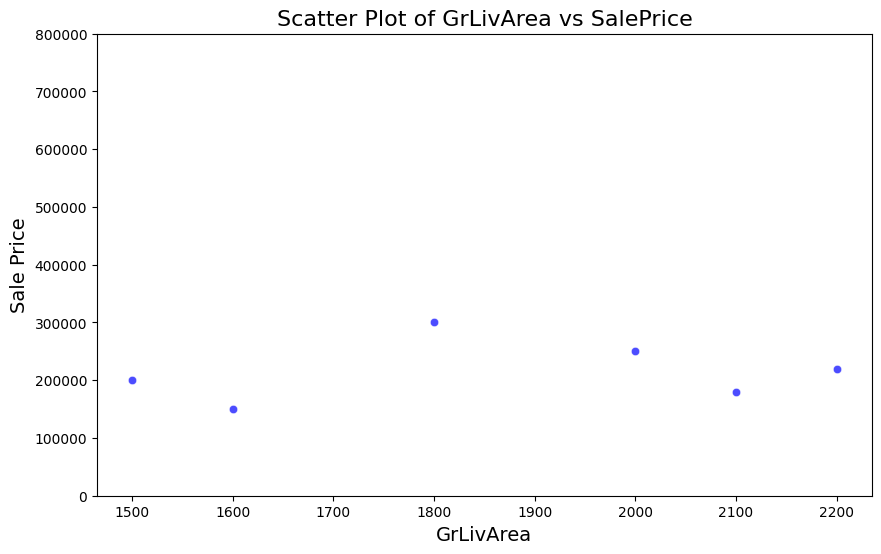

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'GrLivArea': [1500, 1600, 1800, 2000, 2100, 2200]  # Example data
})

var = 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x=var, y='SalePrice', color='blue', alpha=0.7)
plt.ylim(0, 800000)
plt.title(f'Scatter Plot of {var} vs SalePrice', fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

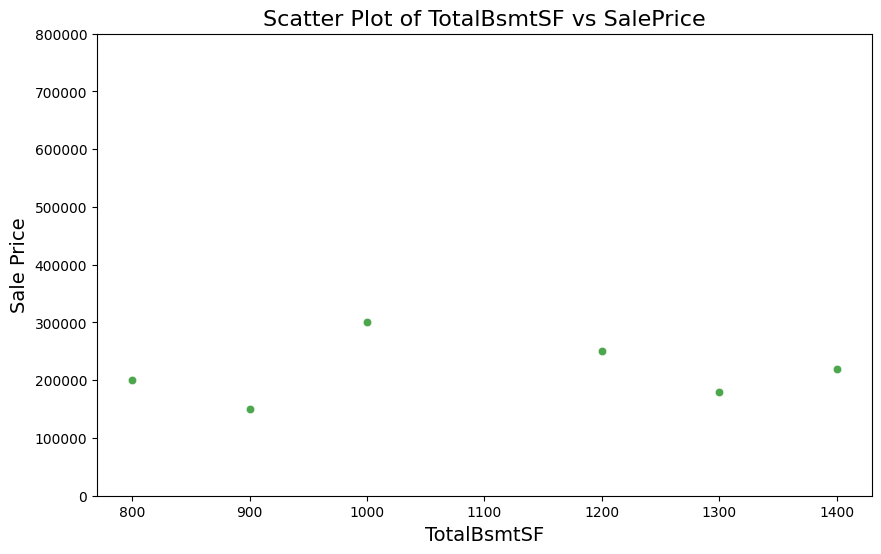

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'TotalBsmtSF': [800, 900, 1000, 1200, 1300, 1400]  # Example data
})
var = 'TotalBsmtSF'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x=var, y='SalePrice', color='green', alpha=0.7)
plt.ylim(0, 800000)
plt.title(f'Scatter Plot of {var} vs SalePrice', fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

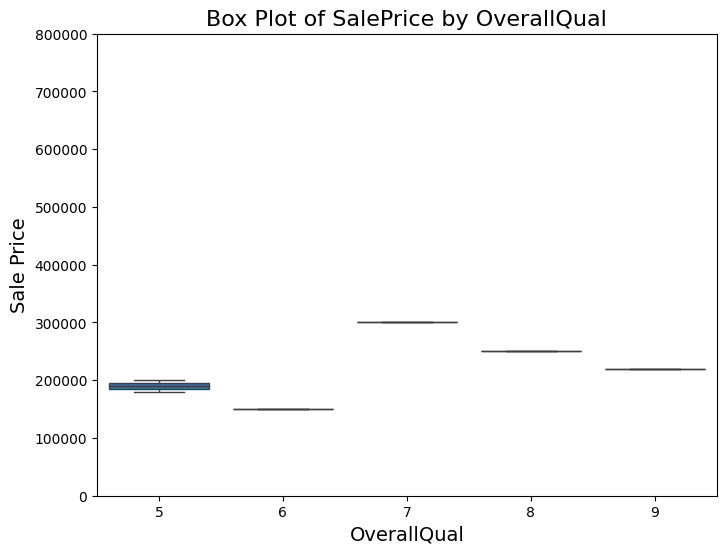

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'OverallQual': [5, 6, 7, 8, 5, 9]
})
var = 'OverallQual'
plt.figure(figsize=(8, 6))
sns.boxplot(x=var, y='SalePrice', data=df_train)
plt.ylim(0, 800000)
plt.title(f'Box Plot of SalePrice by {var}', fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

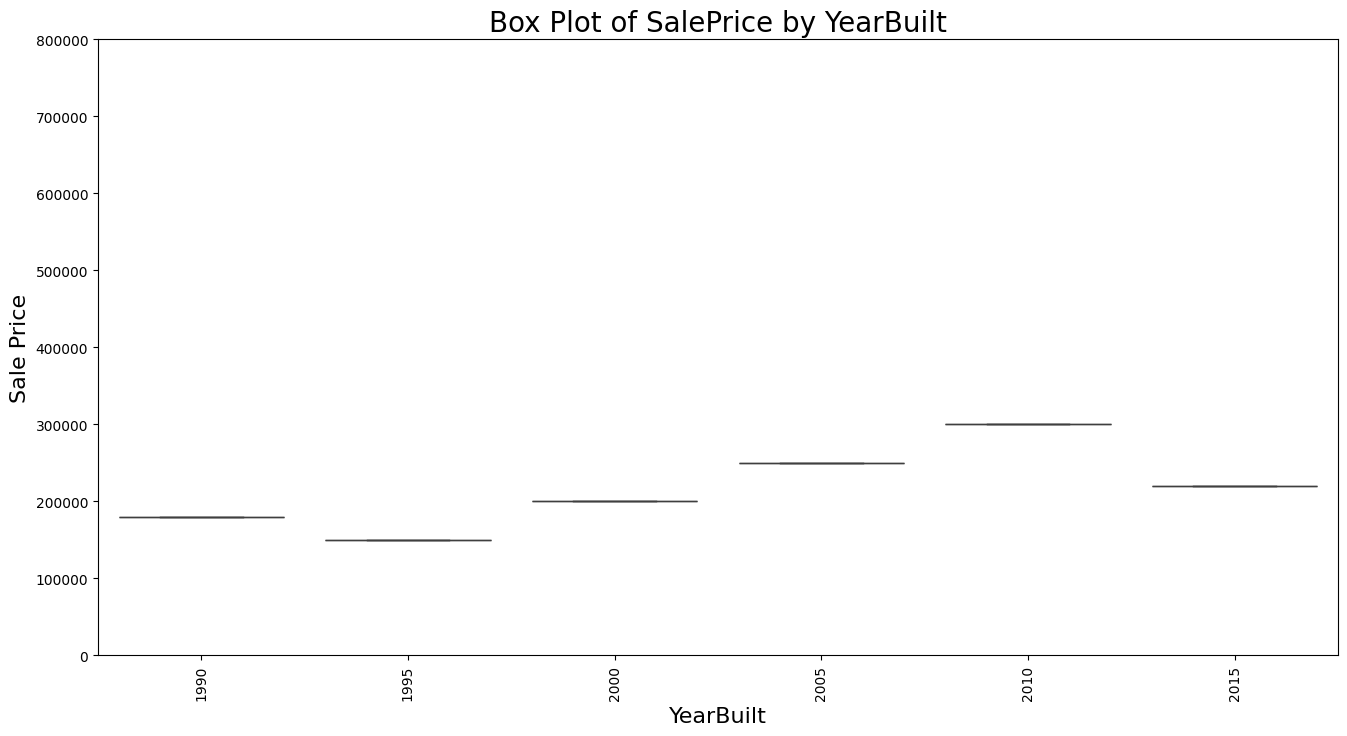

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'YearBuilt': [2000, 1995, 2010, 2005, 1990, 2015]
})
var = 'YearBuilt'
plt.figure(figsize=(16, 8))
sns.boxplot(x=var, y='SalePrice', data=df_train)
plt.ylim(0, 800000)
plt.xticks(rotation=90)
plt.title(f'Box Plot of SalePrice by {var}', fontsize=20)
plt.xlabel(var, fontsize=16)
plt.ylabel('Sale Price', fontsize=16)
plt.show()

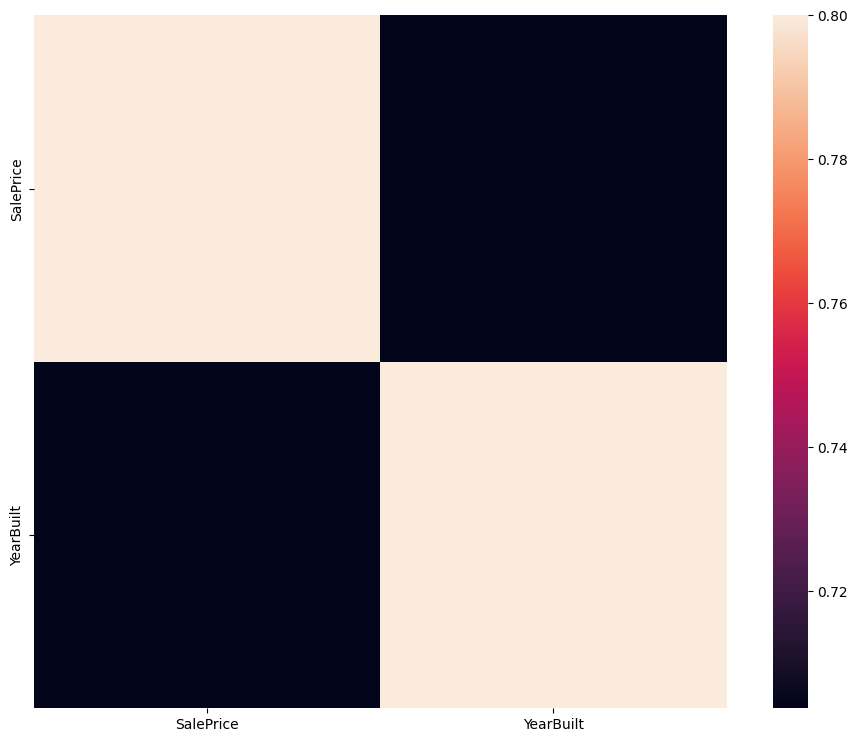

In [15]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

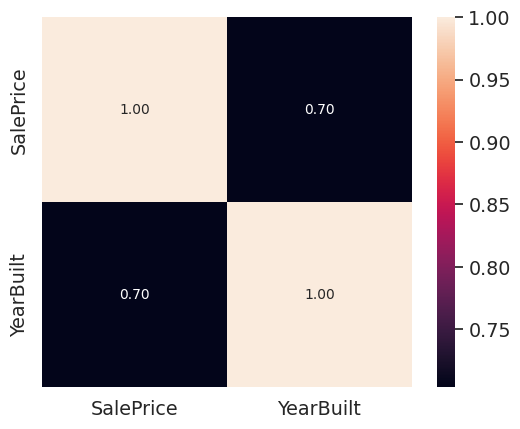

In [16]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
YearBuilt,0,0.0


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000]
})

scaler = StandardScaler()
saleprice_scaled = scaler.fit_transform(df_train[['SalePrice']])
low_range = saleprice_scaled[np.argsort(saleprice_scaled[:, 0])][:10]
high_range = saleprice_scaled[np.argsort(saleprice_scaled[:, 0])][-10:]
print('Outer range (low) of the distribution:')
print(low_range)

print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-1.37360564]
 [-0.7554831 ]
 [-0.34340141]
 [ 0.06868028]
 [ 0.68680282]
 [ 1.71700705]]

Outer range (high) of the distribution:
[[-1.37360564]
 [-0.7554831 ]
 [-0.34340141]
 [ 0.06868028]
 [ 0.68680282]
 [ 1.71700705]]


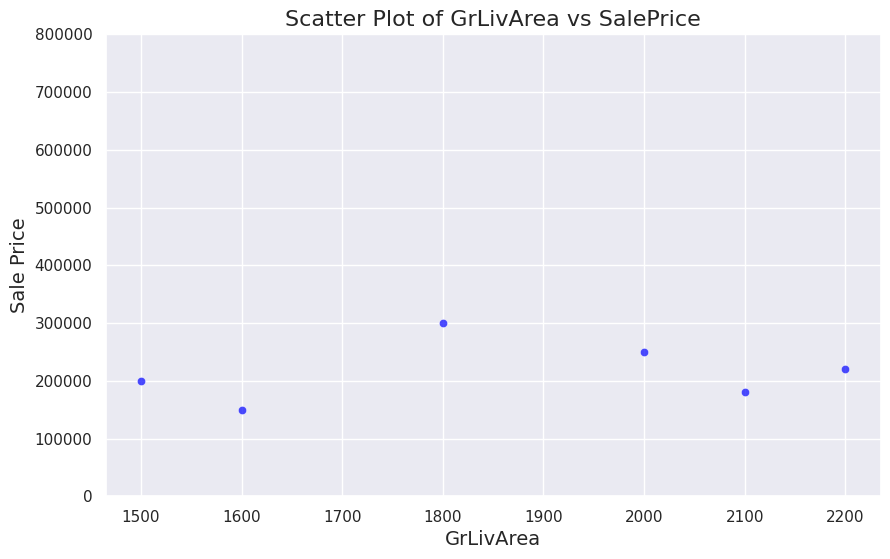

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'GrLivArea': [1500, 1600, 1800, 2000, 2100, 2200]
})
var = 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x=var, y='SalePrice', color='blue', alpha=0.7)
plt.ylim(0, 800000)
plt.title(f'Scatter Plot of {var} vs SalePrice', fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

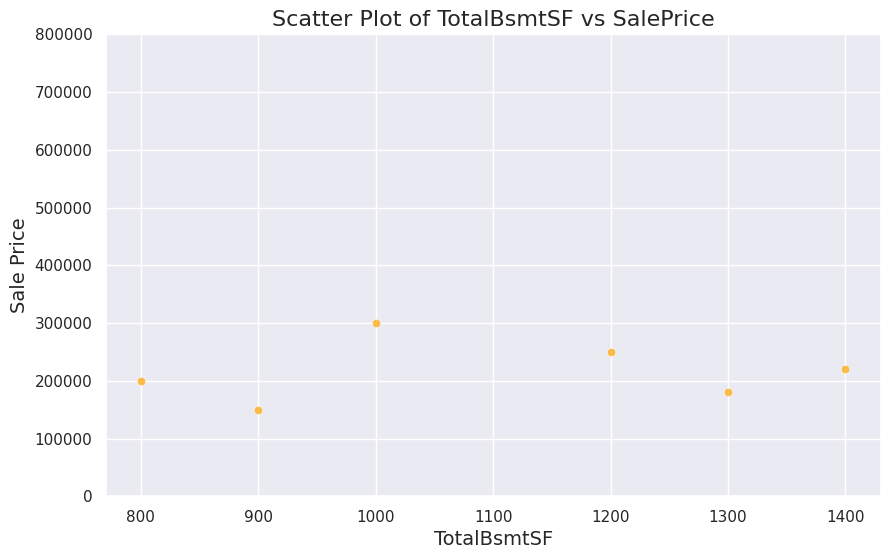

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'TotalBsmtSF': [800, 900, 1000, 1200, 1300, 1400]
})

var = 'TotalBsmtSF'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x=var, y='SalePrice', color='orange', alpha=0.7)
plt.ylim(0, 800000)
plt.title(f'Scatter Plot of {var} vs SalePrice', fontsize=16)
plt.xlabel(var, fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

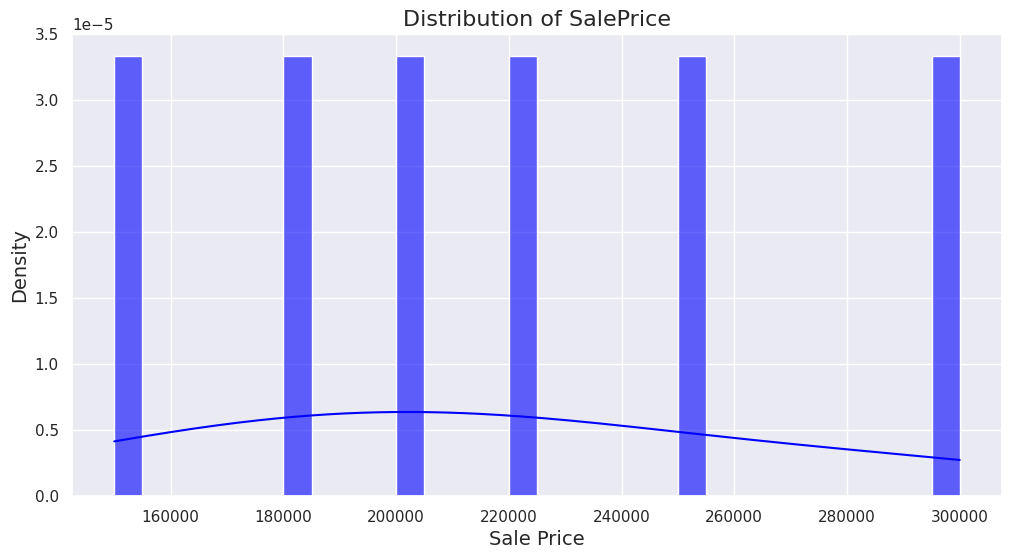

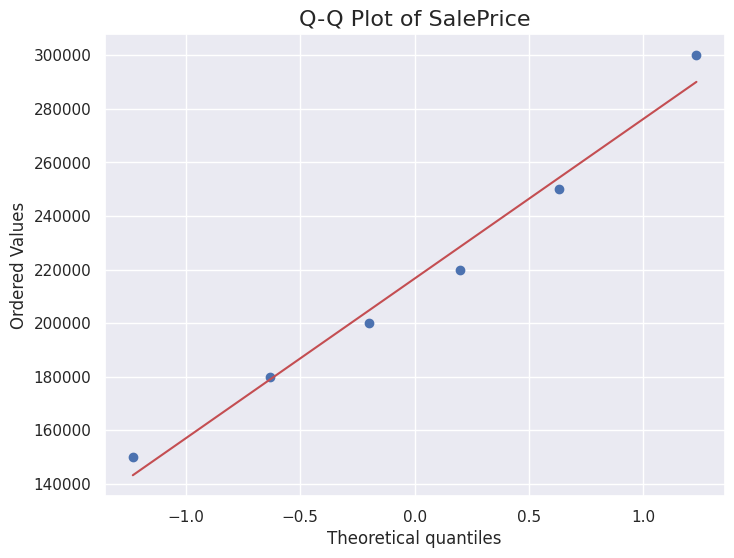

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000]  # Example data
})

plt.figure(figsize=(12, 6))
sns.histplot(df_train['SalePrice'], kde=True, color='blue', bins=30, stat='density', alpha=0.6)
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()
plt.figure(figsize=(8, 6))
res = stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice', fontsize=16)
plt.show()

In [28]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [30]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);


KeyError: 'TotalBsmtSF'

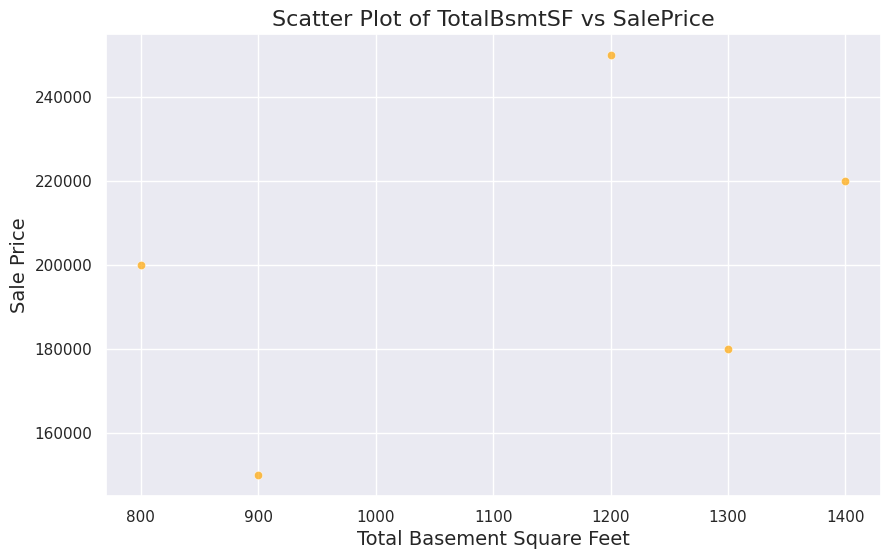

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.DataFrame({
    'SalePrice': [200000, 150000, 300000, 250000, 180000, 220000],
    'TotalBsmtSF': [800, 900, 0, 1200, 1300, 1400]
})
filtered_data = df_train[df_train['TotalBsmtSF'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='TotalBsmtSF', y='SalePrice', color='orange', alpha=0.7)
plt.title('Scatter Plot of TotalBsmtSF vs SalePrice', fontsize=16)
plt.xlabel('Total Basement Square Feet', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

In [32]:
df_train = pd.get_dummies(df_train)